In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# 차원 축소
* 차원의 저주(curse of dimensionlity) : 머신러닝 문제에서 훈련 샘플이 각각이 수천 심지어 수백만 개의 특성을 가지고 있어 훈련을 느리게 할 뿐만 아니라, 좋은 솔루션을 찾기 어렵게 만드는 것
> **CAUTION**  
 * 차원을 축소시키면 일부 정보가 유실된다.(JPEG로 이미지를 압축하면 품질이 감소되는 것처럼). 
 * 그래서 훈련 속도가 빨라질 수는 있지만 시스템 성능이 조금 나빠질 수 있다. 
 * 또한 작업 파이프라인이 조금 더 복잡하게 되고 유지 관리가 어려워진다.
 * 그러므로 차원 축소를 고려하기 전 훈련이 너무 느린지 먼저 원본 데이터로 시스템을 훈련시켜 봐야 한다.
 * 어떤 경우에는 훈련 데이터의 차원을 축소시키면 잡음이나 불필요한 세부사항을 걸러내므로 성능을 높일 수 있다(일반적으로는 훈련 속도만 빨라진다).

* 훈련 속도 상승 외에 데이터 시각화(data visualization, 또는 DataViz)에도 아주 유용하다.
    * 차원 수를 둘로(또는 셋으로) 줄이면 고차원 훈련 세트를 하나의 그래프로 그릴 수 있고, 군집같은 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 많다.

# 1. 차원의 저주
* 고차원 공가에서는 많은 것이 상당히 다르게 작동한다

#### 예
* 단위 면적(1×1 사각형) 안에 있는 점을 무작위로 선택할 때 경계선에서 0.001 이내에 위치할 가능성은 0.4%  
(다른 말로 하면 어느 방향으로든 거의 끝부분에 있는 점을 선택할 가능성은 매우 낮다.)
> * 1×1 사각형에서 테두리 0.001을 제외한 안쪽 사각형의 너비 : $(1 - 0.001×2)^2 = 0.996004$
 * 테두리의 너비 : $1 - 0.996004 = 0.003996$  
 즉, 단위 면적의 약 0.4%
* 하지만 10,000차원의 단위 면적을 가진 초입방체(hypercube)(1×1×$\dots$×1인 입방체, 즉 1을 만 번 곱한 것)에서는 이 가능성이 99.999999%보다 커진다.  
> * 테두리를 제외한 초입방체의 부피(같은 방식으로 계산) : $(1 - 0.001×2)^{10000} \approx 0.000000002$
 * 테두리의 공간 : $1 - 0.000000002 = 0.999999998$  
* 고차원 초입방체에 있는 대다수의 점은 경계와 매우 가까이에 있다.

#### 더 심각한 차이점
* 2차원 단위 면적에서 임의의 두 점을 선택하면 두 점 사이의 거리는 평균적으로 대략 0.52가 된다.
* 3차원 큐브에서 임의의 두 점을 선택하면 평균 거리는 대략 0.66이다.
* 1,000,000차원의 초입방체에서 두 점을 선택하면 평균 거리는 약 428.25 (대략 $\sqrt \frac{1,000,000}{6}$)이다.
> 무작위로 선택한 두 점 사이의 평균 거리는 적분을 이용해 계산한다.  
 * 2차원일 때 평균 거리 : $\frac{1}{15}(\sqrt 2 + 2 + 5ln(1 + \sqrt 2)) = 0.521405$
 * $n$차원일 때 평균 거리 : 최대 $\sqrt \frac{n}{6}$을 넘지 않는다.
 * 1,000,000차원 초입방체에서 평균 거리 : 대략 $\sqrt \frac{1,000,000}{6}$
 
* 이는 매우 직관적이지 않다. 고차원의 데이터셋이 매우 희박한 상태일 수 있어 두 점이 단위 초입방체에 같이 놓여 있어도 이렇게 멀리 떨어져 있다.
* 이는 새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높다는 뜻이다
* 이 경우 예측을 위해 훨씬 많은 외삽(extrapolation)을 해야 하기 때문에 저차원일 때보다 예측이 더 불안정하다.
* 간단히 말해 훈련 세트의 차원이 클수록 과대적합 위험이 커진다.
    
#### 이론적으로 차원의 저주를 해결하는 해결책 하나
* 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것
* 하지만 실제로 일정 밀도에 도달하기 위해 필요한 훈련 샘플수는 차원 수가 커짐에 따라 기하급수적으로 늘어난다.
* 특성 수가 100개라고 해도, 모든 차원에 걸쳐 균일하게 퍼져 있다고 가정하고 훈련 샘플을 서로 평균 0.1 이내에 위치시키려면 관측 가능한 우주에 있는 원자 수 모두를 합친 것보다 더 많은 훈련 샘플을 모아야 한다.
> * 크기가 1인 2차원 평면에 0.1 거리 이내에 훈련 샘플을 모두 높으려면 필요한 샘플 : 최소 $10 \times 10$
 * 10차원으로 확장하면 필요한 샘플 : $10 \times 10 \times \dots \times 10 = 10^{100}$
 * 우주에 존재하는 원자 수 : 대략 $10^{80}$

# 2. 차원 축소를 위한 접근 방법
* 차원을 감소시키는 주요 접근법
    * 투영(projection)
    * 매니폴드 학습(Manifold Learning)

## 2.1. 투영
* 대부분 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다.
* 많은 특성은 거의 변화가 없는 반면, 다른 특성들은 서로 강하게 연관되어 있다.
* 결과적으로 모든 훈련 샘플이 사실 고차원 공간 안의 저차원 부분 공간(subspace)에 (또는 가까이) 놓여있다.

#### 원 모양을 띤 3차원 데이터셋 (2차원에 가깝게 배치된 3차원 데이터셋)

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)

In [10]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [11]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

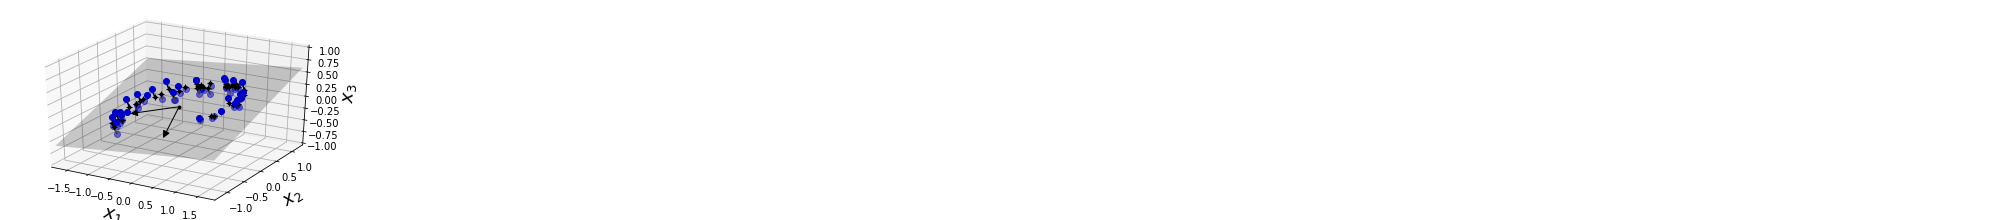

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=4)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

> 모든 훈련 샘플이 거의 평면 형태로 놓여 있다.  
이것이 고차원(3D) 공간에 있는 저차원(2D) 부분 공간이다.  

#### 투영하여 만들어낸 새로운 2D 데이터셋

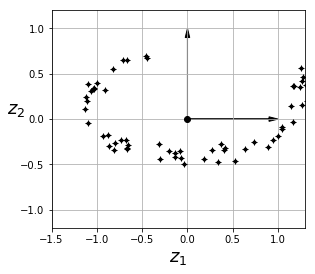

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

> 모든 훈련 샘플을 이 부분 공간에 수직으로 투영하면(즉, 샘플과 평면 사이의 가장 짧은 직선을 따라) 그림과 같은 2D 데이터셋을 얻는다.
 * 각 축은 (평면에 투영된 자표인) 새로운 특성 $z_1$과 $z_2$에 대응된다.
 
그러나 차원 축소에 있어 투영이 언제나 최선의 방법은 아니다.  
많은 경우 아래 **스위스 롤**(Swiss roll) 데이터셋처럼 부분 공간이 뒤틀리거나 휘어 있기도 하다.

In [14]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

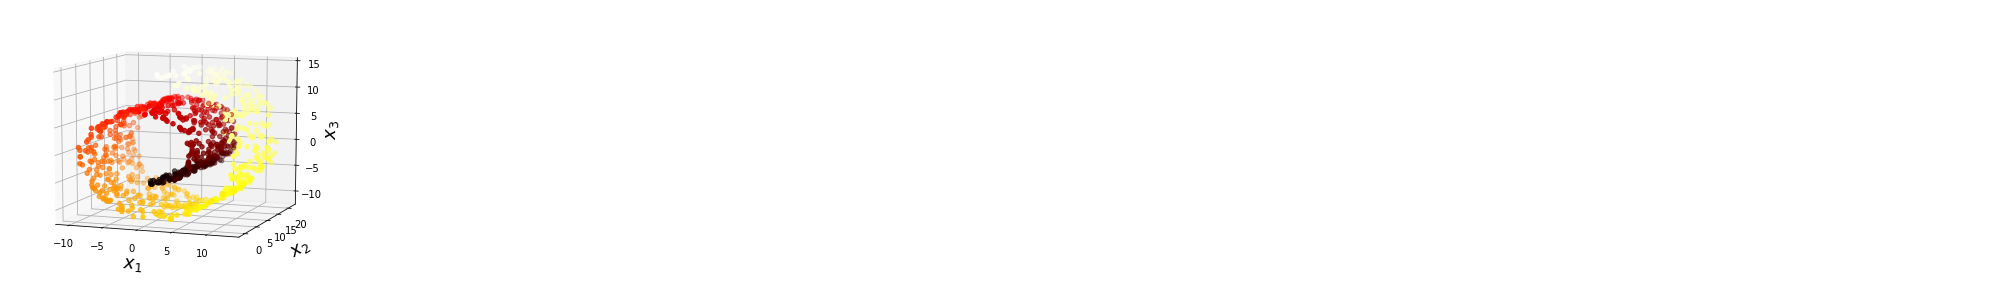

In [15]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

그냥 평면에 투영시키면 (예를 들어 $x_3$를 버리고) 아래 왼쪽처럼 스위스 롤의 층이 서로 뭉개진다.  
하지만 우리가 원하는 것은 스위스 롤을 펼쳐서 오른쪽처럼 2D 데이터셋을 얻는 것이다.

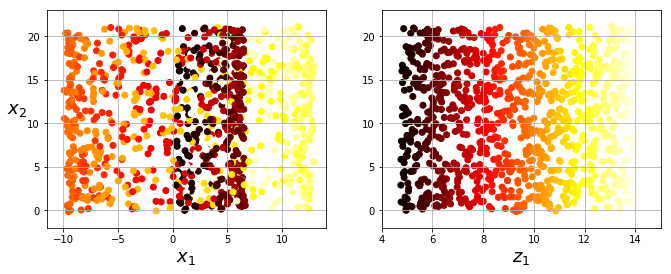

In [16]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0, labelpad=10)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

> * **평면에 그냥 투영시켜서 뭉개진 것 (왼쪽)**
* **스위스 롤을 펼처놓은 것 (오른쪽)**

## 2.2. 매니폴드 학습
* **2D 매니폴드**(manifold) : 고차원 공간에서 휘어지거나 뒤틀린 2D모양
* **$d$차원 매니폴드** : 국부적으로 $d$차원 초명평으로 보일 수 있는 $n$차원 공간의 일부 ($d < n$)
    * 스위스 롤의 경우 $d = 2, n = 3$, 국부적으로 2D 평면으로 보이지만, 3차원으로 말려있다.
* **매니폴드 학습**(Manifold Learning) : 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 것
    * 이는 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 **매니폴드 가정**(manifold assumption) 또는 **매니폴드 가설**(manifold hypothesis)에 근거한다.
* 매니폴드 가정은 종종 암묵적으로 다른 가정과 병행되곤 한다.
    * 바로 처리해야 할 작업(예를 들면 분류나 회귀)이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정
    * 하지만 이런 가정이 항상 유효하지는 않다.
    
#### 저차원에서 항상 간단하지 않은 결정 경계

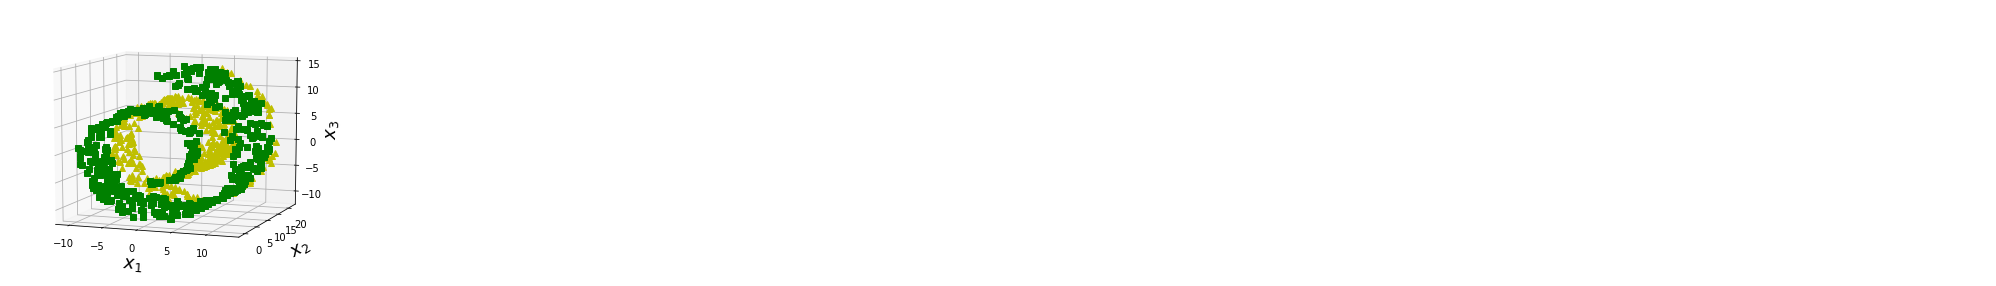

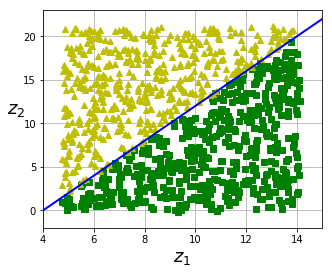

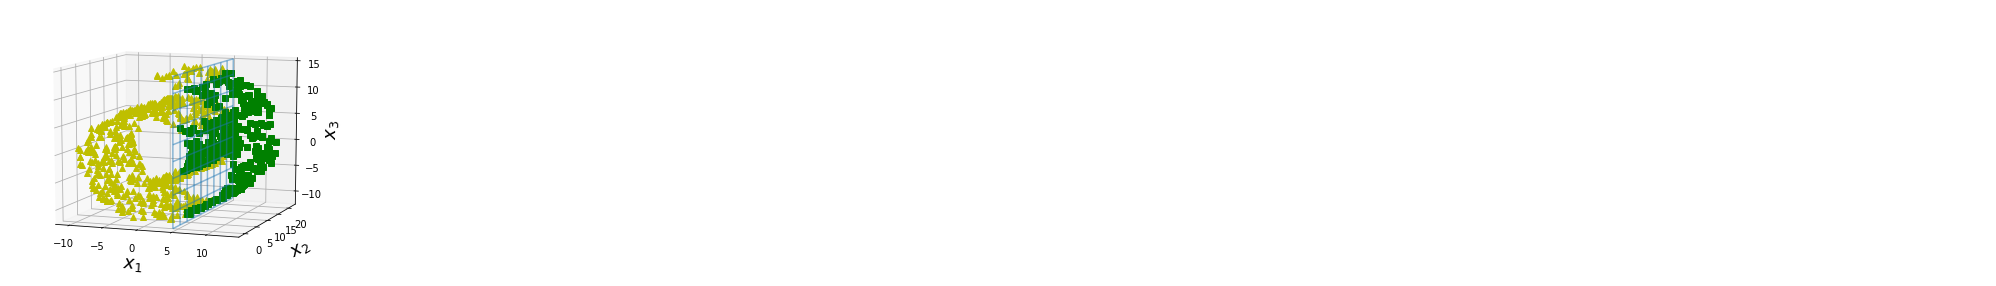

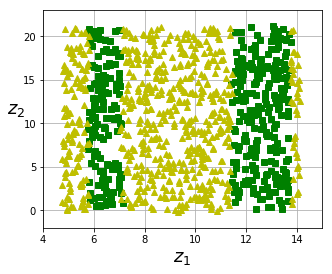

In [20]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')
positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0, labelpad=7)
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')
positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0, labelpad=7)
plt.grid(True)
plt.show()

> * **첫 번째 행**
    * 두 개의 클래스로 나뉜 스위스롤
    * 3D에서는 결정 경계가 매우 복잡하다.
* **두 번째 행**
     * 펼처진 매니폴드 공간인 2D에서는 결정 경계가 단순한 직선이다.
* **세 번째 행**
     * 결정 경계가 $x_1 = 5$에 놓여 있다.
     * 이 결정 경계는 3D 공간에서는 매우 단순하다(수직 평면)
* **네 번째 행**
     * 펼쳐진 매니폴드에서는 결정 경계가 더 복잡해졌다(4개의 독립된 수직선)
     * 결정 경계가 $z_1 = 6, 7, 11.5, 13.5$ 근처에 수직으로 나타난다.
     
#### 요약
모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라지지만, 항상 더 낫거나 간단한 솔류션이 되는 것은 아니다.  
이는 전적으로 데이터셋에 달려있다.

# 3. PCA
* **주성분 분석**(Principal Component Analysis, PCA) : 먼저 데이터에 가장 가까운 초평면(hyperplane)을 정의한 다음 데이터를 이 평면에 투영시킨다.

## 3.1. 분산 보존
* 저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다.

#### 투영할 부분 공간 선택하기

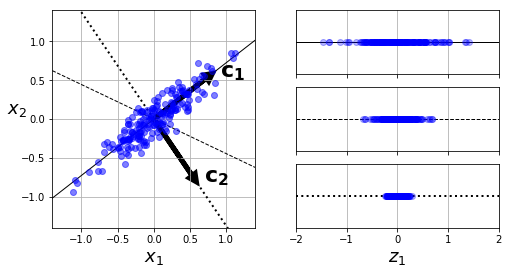

In [21]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

> * **실선($c_1$)에 투영된 것** (오른쪽 첫 번째 그래프)
    * 분산을 최대로 보존한다.
* **파선에 투영된 것** (오른쪽 중간 그래프)
    * 분산을 중간 정도로 유지하고 있다.
* **점선($c_2$)에 투영된 것** (오른쪽 맨 아래 그래프)
    * 분산을 매우 적게 유지하고 있다.
    
* 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실된다.
* 이 선택을 다른 방식으로 설명
    * 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축

## 3.2. 주성분
* PCA는 훈련 세트에서 분산이 최대인 축을 찾는다(위의 예에서 실선($c_1$)).
* 또한 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다.(위 예에서는 선택의 여지가 없어 점선($c_2$))
* 고차원 데이터셋이라면 PCA는 2개의 두 축에 직교하는 세 번재 축을 찾으며, 데이터셋에 있는 차원 수만큼 네 번째, 다섯 번째, $\dots$ 축을 찾는다.
* **$i$번째 주성분**(principal comonent, PC) : $i$번째 축을 정의하는 단위 벡터
    * 위 예에서 1번째 PC : $c_1$, 2번째 PC : $c_2$
    * 3D라면 3번째 PC : 이 두 축이 이루는 평면에 수직일 것이다.
    
> **NOTE**  
주성분의 방향은 일정치 않다.  
훈련 세트를 조금 섞은 다음 다시 PCA를 적용하면 새로운 PC 중 원래 PC와 반대 방향일 수 있다.  
그러나 일반적으로 같은 축에 놓여 있을 것이다.  
어떤 경우에는 한 쌍의 PC가 회전하거나 서로 바뀔 수 있지만 보통은 같은 평면을 구성한다.

### 3.2.1. 훈련 세트의 주성분 찾는 법
* 특잇값 분해(Singular Value Decomposition, SVD)라는 표준 행렬 분해기술을 이용해 훈련 세트 행렬($\mathbf{X}$)를 다음과 같이 분해 할 수 있다. 
$$\mathbf{X} = \mathbf{U} \cdot \Sigma \cdot \mathbf{V}^T$$
* 여기서 모든 주성분이 $\mathbf{V}$에 아래와 같이 담겨 있다.  
**주성분 행렬**
$$ \mathbf{V} = \left( c_1 c_2 \dots c_3 \right) $$
> * 공분산 행렬의 고유 벡터는 어느 방향으로 가장 큰지 나타낸다.   
 * **중앙에 맞춰진 훈련 세트의 공분산 행렬**
$$ Cov = \frac{1}{n - 1}\mathbf{X}^T\mathbf{X} = \frac{1}{n - 1}(\mathbf{U}\Sigma\mathbf{V}^T)(\mathbf{U}\Sigma\mathbf{V}) = \frac{1}{n - 1}\mathbf{V}\Sigma^2\mathbf{V}^T = \mathbf{V}\frac{\Sigma^2}{n - 1}\mathbf{V}^T $$
    * 따라서 $\mathbf{V}$ : 공분산 행렬의 고유 벡터이고 주성분
 * scikit-learn의 PCA는 `scipy.linalg.svd()` 함수로 주성분 $\mathbf{V}$를 구한다.
    * 다만 `scipy.linalg.svd()`나 `numpy.linalg.svd()` 함수에서 반환되는 `U`, `s`, `V` 값 중에서 `V`가 SVD 공식 $\mathbf{U} \cdot \Sigma \cdot \mathbf{V}^T$에서 $\mathbf{V}^T$이다.
    * 그래서 아래 코드에서 `svd` 함수로부터 얻은 `Vt`를 다시 전치하여 첫 번째와 두 번째 열을 주성분으로 추출한다.
    
#### SVD 분해를 사용한 PCA
numpy의 `svd()` 함수를 사용해 "**원 모양 3차원 데이터셋**" 예제 훈련 세트의 모든 주성분을 구한 후 처음 두 개의 PC 추출하기

In [54]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [55]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

> **CAUTION**  
PCA는 데이터셋의 평균이 0이라고 가정한다. 앞으로 볼 scikit-learn의 PCA 클래스는 이 작업을 대신 처리해준다.  
그러나 PCA를 직접 구현하거나 다른 라이브러리를 사용한다면 먼저 데이터를 원점에 맞추는 것을 잊어서는 안된다.

In [56]:
# 여기서부터는 어디에 쓰는거지..
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [57]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

## 3.3. $d$차원으로 투영하기
* 주성분을 모두 추출해냈다면 처음 $d$개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 $d$차원으로 축소시킬 수 있다.
* 이 초평면은 분산을 가능한 한 최대로 보존하는 투영이다.
* 초평면에 훈련 세트를 투영하기 위해 아래 식과 같이 행렬 $\mathbf{X}$와 첫 $d$개의 주성분을 담은 (즉, $\mathbf{V}$의 첫 $d$열로 구성된) 행렬 $\mathbf{W}_d$를 점곱하면 된다.
* 훈련 세트를 $d$차원으로 투영하기
$$ \mathbf{X}_{d - proj} = \mathbf{X} \cdot \mathbf{W}_d $$
> 맨 앞에서 본 "**원 모양을 띤 3차원 데이터셋**"에서 샘플 수는 60개이므로 
 * 행렬 $\mathbf{X}$ : (60, 3)
 * 두 개의 주성분이 담긴 $\mathbf{W}_d$의 크기 : (3, 2)
 * 따라서 투영된 $\mathbf{X}_{d-proj}$ 행렬의 크기 : (60, 2)
 * 주성분은 원본 데이터 공간에서 어떤 방향을 나타내므로 입력 행렬 $\mathbf{X}$의 차원 3과 동일하다.

In [59]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

> PCA 변환이 되었다. 지금까지 분산을 가능한 한 최대로 유지하면서 어떻게 데이터셋의 차원을 특정 차원으로 축소하는지 살펴보았다.

## 3.4. scikit-learn 사용하기
* scikit-learn의 `PCA` 모델은 앞서 한 것 처럼 SVD 분해 방법을 사용하여 구현한다.

#### `PCA` 모델을 사용해 데이터셋의 차원을 2차원으로 줄이는 코드
scikit-learn의 `PCA`는 자동으로 데이터를 중앙에 맞춘다.

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

PCA 변환기를 데이터셋에 학습시키고 나면 `components_` 변수로 주성분을 확인할 수 있다. (이 변수에는 주성분이 행 벡터로 포함되어 있으므로, 첫 번째 주성분은 `pca.components_.T[:, 0]`이 된다.)

#### 데이터셋을 조금 다르게해서 PCA 실행 결과 보기
데이터셋을 조금 다르게해서 PCA를 실행하면 실행 결과가 달라지는데 일반적으로 일부 축이 반대로 바뀌는 정도이다.  
이 예에서 scikit-learn의 PCA는 두 축이 반대로 뒤집힌 것 외에는 SVD 방식을 사용한 것과 동일한 투영 결과를 만든다.

In [61]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [62]:
np.allclose(X2D, -X2D_using_svd)

True

#### 원래 차원(3D)으로 복원한 실행 결과 보기

In [63]:
X3D_inv = pca.inverse_transform(X2D) # 평면(PCA 2D 부분공간)에 투영된 3D 포인트 복원
np.allclose(X3D_inv, X)

False

> 투영 단계에서 일부 정보를 잃어버리기 때문에 복원된 3D 포인트와 원본 3D 포인트가 완전히 똑같지는 않다.

#### 재구성 오차 계산

In [64]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

#### SVD 방식의 역변환
scikit-learn의 `PCA` 클래스는 자동으로 평균을 뺏던 것을 복원해주기 때문에 두 방식의 재구성 오차가 동일하지는 않다.  
하지만 평균을 빼면 동일한 재구성을 얻을 수 있다.

In [65]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

#### `PCA` 객체와 SVD 방법으로 계산된 주성분 비교

In [66]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [67]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

> 축이 뒤집혔다.

## 3.5. 설명된 분산의 비율
* `explained_variance_ratio_` 변수에 저장된 주성분의 **설명된 분산의 비율**(explained variance ratio)도 유용한 정보 중 하나이다.
> * PCA의 주성분으로 설명된 분산은 위에서 본 공분산 행렬의 고윳값(eigenvalue), 즉 $\frac{\Sigma^2}{n - 1}$이다.
    * $\Sigma$ : `svd()` 함수가 반환하는 `s`
 * 이 값이 `explained_variance_ratio_` 변수에 저장되며, 설명된 분산의 비율은 전체 분산에서 차지하는 비율이다.
* 이 값은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다.

#### "원 모양 3차원 데이터셋"의 처음 두 주성분에 대한 설명된 분산 비율

In [68]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

> 첫 번째 차원이 84.2%의 분산을 포함하고 있고, 두 번째 축이 14.6%의 분산을 설명한다.

In [69]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

> * 2D로 투영했기 때문에 분산의 1.1%을 잃었다.
* 세 번째 축에 1.1% 미만이 남아있을 것이므로 아주 적은 양의 정보가 들어 있다고 생각해도 된다.

#### SVD 방식을 사용했을 때 설명된 분산의 비율 계산 방법
`s`는 행렬 $\mathbf{S}$의 대각 성분

In [70]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

## 3.6. 적절한 차원 수 선택하기

#### 차원을 축소하지 않고 PCA 계산한 뒤 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원수 계산
> * `n_components` 미지정 시 특성 수와 샘플 수 중 작은 값으로 설정된다.  
* `np.cumsum()` : 입력 배열의 원소를 차례대로 누적한 배열을 반환한다.

In [80]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [81]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

그런 다음 `n_components=d`로 설정하여 PCA를 다시 실행한다.

#### 유지하려는 주성분의 수를 지정하는 것보다 좋은 방법 1: 분산의 비율 설정
`n_components`에 보존하려는 분산의 비율을 0.0 ~ 1.0 사이로 설정하여 PCA를 실행하는 편이 훨씬 낫다.

In [84]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

In [86]:
np.sum(pca.explained_variance_ratio_)

0.9504164142161965

#### 또 다른 방법 2: 설명된 분산을 차원 수에 대한 함수로 그리는 것
* 그냥 `cumsum` 그래프로 그리면 된다.
<img src="../../dsschool_img/cumsum.png">
* 일반적으로 이 그래프에서 설명된 분산의 빠른 성장이 멈추는 변곡점이 있다.  
이를 데이터셋에 내재된 고유 차원으로 생각할 수 있다.
* 여기서는 차원을 약 100으로 축소해도 설명된 분산을 크게 손해 보지 않을 것이다.

## 3.7. 압축을 위한 PCA
* 확실히 차원 축소 후에는 훈련 세트의 크기가 줄어든다.

#### 압축
* MNIST 데이터셋에 분산의 95%를 유지하도록 PCA를 적용하면 각 샘플은 (784개 특성이 아니라) 150개 정도만 가지고 있을 것이다.
* 대부분의 분산은 유지되었지만 데이터셋은 원본 크기의 20% 미만이 되었다.
* 이는 상당한 압축률이고 (SVM같은) 분류 알고리즘의 속도를 크게 높일 수 있다.

#### 복원 (역변환)
* 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 784개 차원으로 되돌릴 수 있다.
* 물론 투영에서 일정량의 정보(유실된 5% 분산)를 잃어버려 이렇게 해도 원본 데이터셋을 얻을 수는 없지만 매우 비슷할 것이다.
* **재구성 오차**(reconstruction error) : 원본 데이터와 재구성된 데이터(압축 후 원복한 것) 사이의 평균 제곱 거리
* 원본의 차원 수로 되돌리는 PCA 역변환 공식
$$ \mathbf{X}_{recovered} = \mathbf{X}_{d-proj} \cdot \mathbf{W}_d^T $$
> **역변환 과정**  
 * 주성분의 전치 행렬인 $\mathbf{V}^T$(또는 $\mathbf{W}_d^T$)가 `components_` 변수에 저장되어 있으므로, `inverse_transform()`에서는 압축된 데이터셋에 `components_`를 점곱하고 원본 데이터셋에서 구한 평균을 더한다.
 * `X_train`의 크기 : (52500, 784)
 * PCA 변환 후 `X_reduced`의 크기 : (52500, 154)
 * 주성분의 전치인 `components_`의 크기 : (154, 784)
 * `X_reduced`와 `components_`의 점곱 : (52500, 784)

#### 분산의 95%가 유지된 MNIST 압축
MNIST 데이터셋을 154차원으로 압축하고 `inverse_transform()`으로 784차원으로 복원한다.

In [88]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [94]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, '압축 후 복원')

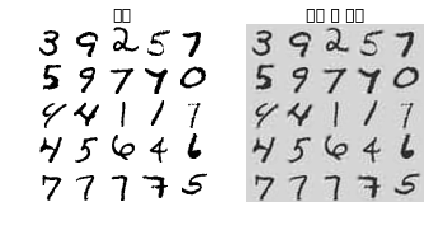

In [95]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)

> * **원본 훈련 세트** (왼쪽)
* **압축 후 복원** (오른쪽)
    * 이미지 품질이 조금 손실됐지만 숫자 모양은 거의 온전하다.

In [102]:
X_reduced_pca = X_reduced # 점진적 PCA와 비교를 위해

## 3.8. 점진적 PCA
* PCA 구현의 문제 : SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 하는 것

### 3.8.1. 점진적 PCA
* **점진적 PCA**(Incremental PCA, IPCA) 알고리즘을 사용하면 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다.
* 이런 방식은 훈련 세트가 클 때 유용하고, 온라인으로(즉, 새로운 데이터가 준비되는 대로 실시간으로) PCA를 적용할 수도 있다.

#### MNIST 데이터셋에 점진적 PCA 적용하기
* 데이터셋을 100개의 미니배치로 나누고(numpy의 `array_slplit()` 이용) scikit-learn의 `IncrementalPCA` 클래스에 주입하여 MNIST 데이터셋 차원을 154개로 줄인다.  
* (전체 훈련 세트를 사용하는 `fit()` 메서드가 아닌) `partial_fti()` 메서드를 미니배치마다 호출해야 한다.

In [103]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    print(".", end='')
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [104]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

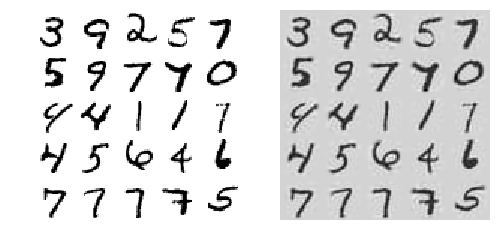

In [105]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

#### 일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 비교

In [106]:
X_reduced_inc_pca = X_reduced
np.allclose(pca.mean_, inc_pca.mean_) # 평균 비교

True

In [108]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

True

> 결과가 완전 동일하지 않고, 점진적 PCA는 아주 훌륭한 근사치를 제공할 수도 있는 듯?

### 3.8.2. numpy의 `memmap` 클래스 사용하는 방법
* numpy의 `memmap` 클래스를 사용해 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 들어 있는 것처럼 다루는 것
* 이 클래스는 필요할 때 데이터를 메모리에 적재한다.
* `IncrementalPCA`는 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결 할 수 있다.
* 이 때는 일반적인 `fit()` 메서드를 사용할 수 있다.
> `IncrementalPCA`의 `fit()` : batch_size만큼 전체 훈련 데이터를 미니배치로 나누어 `partial_fit()` 메서드를 호출한다. (bath_size 기본값 : 특성 수의 5배)


1. `memma1p()` 구조를 만들고 MNIST 데이터를 복사한다. (이는 별도의 프로그램에서 먼저 수행된다.)

In [116]:
filename = 'my_mnist.data'
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m , n))
X_mm[:] = X_train

OSError: [Errno 22] Invalid argument: 'my_mnist.data'

2. 이제 `memmap()` 객체를 삭제하면 파이썬 종결자(finalizer)를 호출해서 데이터를 디스크에 저장하게 된다.

In [113]:
del X_mm

3. 다음에 다른 프로그램에서 데이터를 로드하여 훈련에 사용한다.

In [117]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

C:\Anaconda3\lib\site-packages\sklearn\decomposition\incremental_pca.py:281: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [118]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 3.9. 랜덤 PCA
* **랜덤 PCA**(Randomized PCA) : 확률적인 알고리즘으로, 첫 $d$개의 주성분에 대한 근삿값을 빠르게 찾는다.
* 랜덤 PCA의 계산 복잡도 : $\mathbf{O}(m \times n^2) + \mathbf{O}(n^3)$이 아니라 $\mathbf{O}(m \times d^2) + \mathbf{O}(d^3)$
* 그래서 $d$가 $n$보다 많이 작으면 앞선 알고리즘보다 매우 빨라진다.
> * PCA를 구하는 전통적인 방법 : 공분산 행렬($\mathbf{O}(m \times n^2)$)을 구한 다음 이 행렬의 고유 벡터($\mathbf{O}(n^3)$)를 구하는 것
    * $\mathbf{O}(m \times n^2) + \mathbf{O}(n^3)$
 * scikit-learn의 PCA에 구현된 SVD 방식의 계산 복잡도 : $\mathbf{O}(n_{max}^2 \cdot n_{min})$
    * 특성 수와 샘플 수 중 큰 수 : $n_{max}$
    * 작은 수 : $n_{min}$
 * 랜덤 PCA의 계산 복잡도 : $\mathbf{O}(n_{max}^2 \cdot n_{d})$
     * 주성분의 수가 $n_d$가 $n_{min}$보다 작을 때 PCA보다 빠르다.

In [119]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### 3.9.1. 시간 복잡도
주성분 개수를 바꾸어가며 점진적 PCA와 랜덤 PCA에 비해 일반 PCA 시간을 재어보기

In [120]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 1.7 seconds
    IncrementalPCA: 11.5 seconds
    PCA: 1.5 seconds
n_components = 10
    PCA: 1.8 seconds
    IncrementalPCA: 12.1 seconds
    PCA: 1.8 seconds
n_components = 154
    PCA: 5.0 seconds
    IncrementalPCA: 17.5 seconds
    PCA: 5.0 seconds


#### 데이터셋 크기를 바꾸어가며 일반 PCA와 랜덤 PCA 비교

Text(0.5, 1.0, 'PCA와 랜덤 PCA의 시간 복잡도')

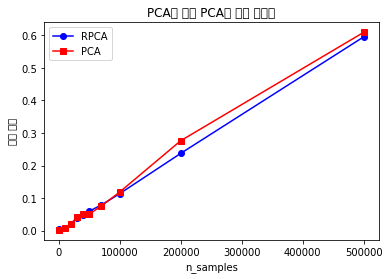

In [122]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("훈련 시간")
plt.legend(loc="upper left")
plt.title("PCA와 랜덤 PCA의 시간 복잡도")

#### 특성 개수 달리하면서 2,000개 샘플이 있는 데이터셋에서 성능 비교

Text(0.5, 1.0, 'PCA와 Randomized PCA의 시간 복잡도')

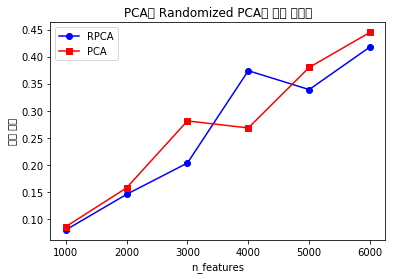

In [123]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("훈련 시간")
plt.legend(loc="upper left")
plt.title("PCA와 Randomized PCA의 시간 복잡도")

# 4. 커널 PCA
* 5장에서 샘플을 매우 높은 고차원 공간(특성 공간 (feature space))으로 암묵적으로 매핑하여 서포트 벡터 머신의 비선형 분류와 회귀를 가능하게 하는 수학적인 기법인 커널 트릭에 대해 이야기했다.
* 고차원 특성 공간에서의 선형 결정 경계는 **원본 공간**에서는 복잡한 비선형 결정 경계에 해당한다는 것을 배웠다.
* 같은 기법을 PCA에 적용해 복잡한 비선형 투영으로의 차원 축소를 가능하게 할 수 있다. 이를 **커널 PCA**(kernel PCA, kPCA)라고 한다.
* 이 기법은 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다.

#### `KernelPCA`를 사용해 RBF 커널로 kPCA 적용
* RBF 커널과 다른 커널들에 대한 자세한 내용은 5장 참조

In [124]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [125]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

C:\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\ucee4' [U+cee4], substituting with a dummy symbol.
  MathTextWarning)
C:\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\ub110' [U+b110], substituting with a dummy symbol.
  MathTextWarning)
C:\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\uc2dc' [U+c2dc], substituting with a dummy symbol.
  MathTextWarning)
C:\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\uadf8' [U+adf8], substituting with a dummy symbol.
  MathTextWarning)
C:\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\ubaa8' [U+baa8], substituting with a dummy symbol.
  MathTextWarning)
C:\Anaconda3\lib\site-packages\matplotlib\mathtext.py:8

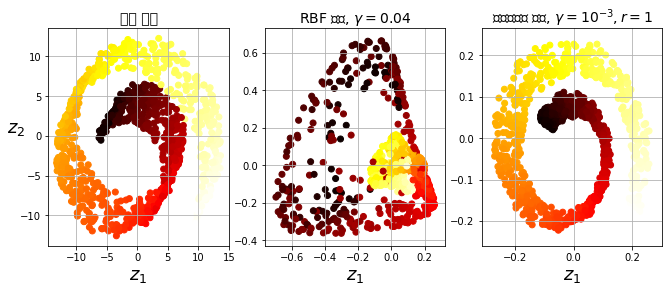

In [127]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, 
                    fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, 
                    fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), 
                            (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), 
                            (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

> **여러 가지 커널의 kPCA를 사용해 2D로 축소시킨 스위스 롤**
* (단순히 `PCA`를 사용한 것과 동일한) 선형 커널 (첫 번째)
* RBF 커널
* 시그모이드(로지스틱) 커널

## 4.1. 커널 선택과 하이퍼파라미터 튜닝
* kPCA는 비지도학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.
* 하지만 차원 축소는 종종 지도 학습(예를 들면 분류)의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

#### 두 단계의 파이프라인 만들기
1. 먼저 kPCA를 사용해 차원을 2차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용한다.
2. 파이프라인 마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 `GridSearchCV`를 사용해 kPCA의 가장 좋은 커널과 `gamma` 파라미터를 찾는다.

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression(solver='liblinear'))
])
param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRe...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


* 완전한 비지도 학습방법으로, 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 존재
* 하지만 재구성은 선형 PCA만큼 쉽지 않다.

#### 커널 PCA와 재구성 원상 오차
<img src="../../dsschool_img/kernel_pca.png">

> * **스위스롤의 원본 3D 데이터셋** (왼쪽 위)
* **RBF 커널의 kPCA를 적용한 2D 데이터셋** (오른쪽 위)
    * 축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓이게 된다. (그림에서 ×로 표현한 것처럼)
* **특성 맵(feature map) $\varphi$를 사용한 무한 차원의 특성 공간에 매핑** (오른쪽 아래)
    * 커널 트릭 덕분에 훈련 세트를 특성 맵(feature map) $\varphi$를 사용한 무한 차원의 특성 공간에 매핑한 다음, 변환된 데이터셋을 선형 PCA를 사용해 2D로 투영한 것과 수학적으로 동일하다.
    * 특성 공간은 무한 차원이기 때문에 재구성된 포인트를 계산할 수 없고 재구성에 따른 실제 에러를 계산할 수 없다.
    * 다행히 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다. 이를 **재구성 원상**(pre-image)라고 한다.
        * > 원상 또는 역상(inverse image) : 어떤 함수($f:X \rightarrow Y$)에 대한 공역($Y$) 원소에 대응하는 정의역($X$) 원소로 이뤄진 부분 집합
    * 원상을 얻게 되면 원본 샘플과의 제곱 거리를 측정할 수 있다.
    * 그래서 재구성 원상의 오차를 최소화하는 커널과 하이퍼파라미터를 선택할 수 있다.

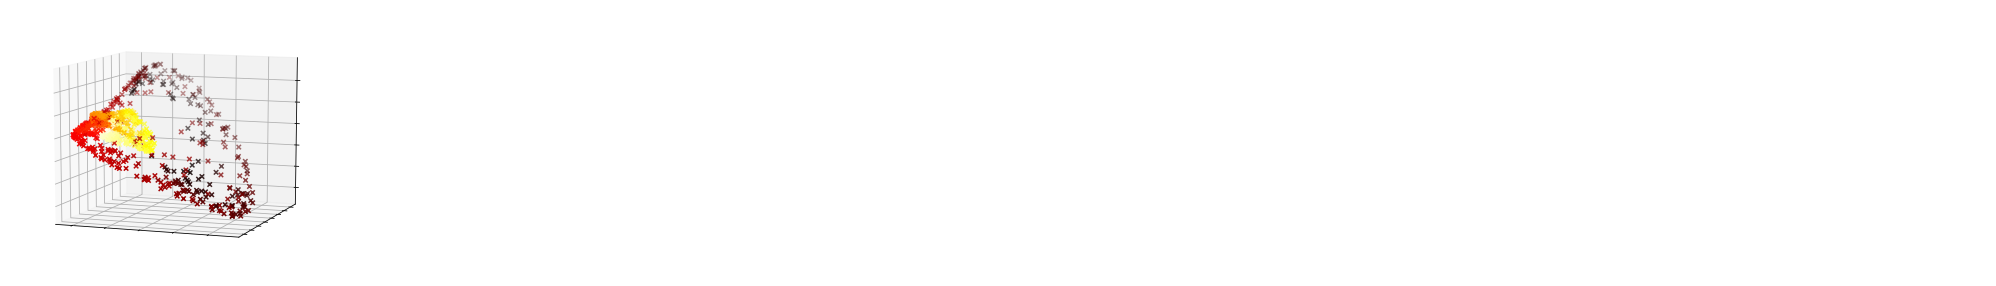

In [132]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

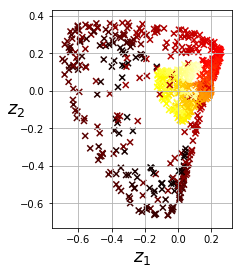

In [133]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

#### 재구성 방법 중 한 가지
* 투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델을 훈련시키는 것
* scikit-learn에서 `fit_inverse_transform=True`로 지정하여 이를 자동으로 수행한다.

In [134]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, 
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

> **NOTE**  
`KernelPCA`는 `inverse_transform()` 메서드를 가지고 있지 않다.  
`fit_inverse_transform=True` 지정 시 생성된다. (default는 `False`)

그런 다음 재구성 원상 오차를 계산할 수 있다.

In [135]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766125

이렇게 되면 재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터를 찾기 위해 교차 검증으로 그리드 탐샘을 사용할 수 있다.

# 5. LLE
* **지역 선형 임베딩**(Locally Linear Embedding, LLE) 특징
    * 또 다른 강력한 **비선형 차원 축소**(nonlinear dimensionality reduction, NLDR) 기술이다.
    * 이전 알고리즘처럼 투영에 의존하지 않는 매니폴드 학습이다.
* LLE 동작
    * 먼저 각 훈련 샘플이 가장 가까운 이웃(closest neighbor, c.n.)에 얼마나 선형적으로 연관되어 있는지 측정한다.
    * 그런 다음 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.
        * 이는 특히 잡음이 너무 많지 않은 경우 매니폴드를 펼치는 데 잘 작동한다.
        
#### `LocallyLinearEmbedding`을 사용해 스위스 롤 펼치기

In [136]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [137]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

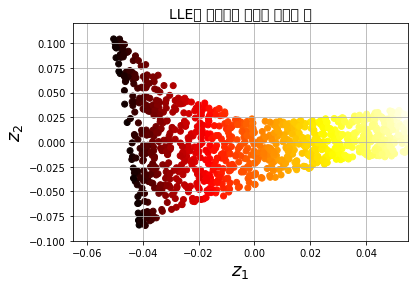

In [138]:
plt.title('LLE를 사용하여 펼쳐진 스위스 롤', fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

> 결과 스위스 롤이 완전히 펼쳐졌고 지역적으로는 샘플 간 거리가 잘 보존되어 있다.  
그러나 크게 보면 샘플 간 거리가 잘 유지되어 있지 않다.  
펼쳐진 스위스 롤의 오른쪽은 압축되어 있고, 왼쪽은 확장되어 있다.  
그럼에도 불구하고 LLE는 매니폴드를 모델링하는 데 잘 동작한다.

## 5.1. LLE 작동 방식

### 5.1.1. LLE 단계 1
1. 알고리즘이 각 훈련 샘플 $x^i$에 대해 가장 가까운 $k$개의 샘플을 찾는다.(앞 코드에서는 $k=10$)
> $k$는 `n_neighbors` 매개변수 값 (default는 5)
2. 그런 다음 이 이웃에 대한 선형 함수로 $x^i$를 재구성한다.  
더 구체적으로 $x^i$와 $\sum_{j=1}^m w_{i,j}x^j$ 사이의 제곱 거리가 최소가 되는 $w_{i, j}$를 찾는다.
    * 여기서 $x^j$가 $x^i$의 가장 가까운 $k$개 이웃 중 하나가 아닐 경우 $w_{i,j} = 0$이 된다.

그러므로 LLE의 첫 단계는 아래 식과 같은 제한이 있는 최적화 문제가 된다.
#### LLE 단계 1 : 선형적인 지역 관계 모델링
$$ \hat W = argmin_W \sum_{i=1}^m \left(x^i - \sum_{j=1}^m w_{i,j}x^j \right)^2 $$

$$ [조건] \begin{cases} w_{i,j} = 0 & x^j\mbox{가 }x^i\mbox{의 최근접 이웃 }k\mbox{개 중 하나가 아닐 때} \\
\sum_{j=1}^m w_{i,j} = 1 & i = 1, 2, \dots, m\mbox{일 때}
\end{cases}$$

이 단계를 거치면 (가중치 $\hat W_{i, j}$를 담고 있는) 가중치 행렬 $\hat W$은 훈련 샘플 사이에 있는 지역 선형 관계를 담고 있다.

### 5.1.2. LLE 단계 2
* 가능한 한 이 관계가 보존되도록 훈련 샘플을 $d$차원 공간($d < n$)으로 매핑한다.
* 만약 $z^i$가 $d$차원 공간에서 $x^i$의 상(image)이라면 가능한 한 $z^i$와 $\sum_{j=1}^m \hat w_{i,j}z^j$ 사이의 거리가 최소화되어야 한다.
* 이 아이디어는 아래 식과 같은 제약이 없는 최적화 문제로 바꾸어준다.

#### LLE 단계 2 : 관계를 보존하는 차원 축소
$$ Z = argmin_Z\sum_{i=1}^m \left(z^i - \sum_{j=1}^m \hat w_{i,j}z^j \right)^2 $$
   * $Z$ : 모든 $z^i$를 포함하는 행렬

* 첫 번째 단계와 비슷해 보이지만, 샘플을 고정하고 최적의 가중치를 찾는 대신, 반대로 가중치를 고정하고 저차원의 공간에서 샘플 이미지의 최적 위치를 찾는다.

### 5.1.3. LLE 구현의 계산 복잡도
* $k$개의 가장 가까운 이웃 찾는데 $\mathbf{O}(mlog(m)nlog(k))$
* 가중치 최적화에 $\mathbf{O}(mnk^3)$
* 저차원 표현을 만드는데 $\mathbf{O}(dm^2)$
* 마지막 항의 $m^2$ 때문에 이 알고리즘을 대량의 데이터셋에 적용하기는 어렵다.
> 이 절은 `LocallyLinearEmbedding`의 `method` 매개변수가 기본값인 `'standard'`일 때의 설명

# 6. 다른 차원 축소 기법
#### 다차원 스케일링(MDS, Multidimensional Scaling)
* 샘플 간의 거리를 보존하면서 차원을 축소한다.
* 아래 그림 첫 번째

#### Isomap
* 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다.
* 그런 다음 샘플 간의 **지오데식 거리**(geodesic distance)를 유지하면서 차원을 축소한다.
* 그래프에서 두 노드 사이의 지오데식 거리 : 두 노드 사이의 최단 경로를 이루는 노드의 수

#### t-SNE(t-Distributed Stochastic Neighbor Embedding)
* 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소한다.
* 주로 시각화에 많이 사용
* 특히 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용한다(예를 들면 MNIST 데이터셋을 2D로 시각화 할 때)

#### 선형 판별 분석(LDA, Linear Discriminant Analysis)
* 사실 분류 알고리즘이지만 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습한다.
* 이 축은 데이터가 투여외는 초평면을 정의하는 데 사용할 수 있다.
* 이 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM 분류기같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 좋다.

In [140]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [141]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [142]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = X # mnist["data"]
y_mnist = y # mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

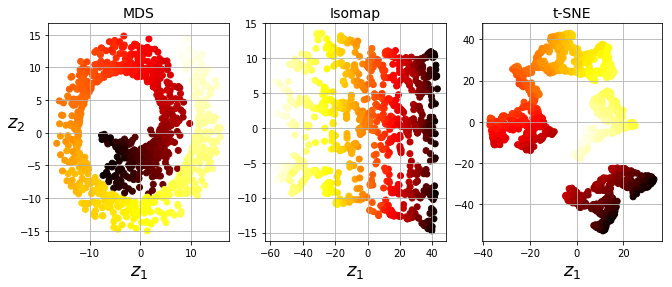

In [145]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# 연습문제

## 1.
데이터셋의 차원을 축소하는 주요 목적은 무엇인가요? 대표적인 단점은 무엇인가요?

* 차원 축소의 주요 목적
    * 훈련 알고리즘의 속도를 높이기 위해 (어떤 경우에는 잡음과 중복된 특성을 삭제할 수도 있어 훈련 알고리즘의 성능을 높입니다.)
    * 데이터를 시각화하고 가장 중요한 특성에 대한 통찰을 얻기 위해
    * 메모리 공간을 절약하기 위해(압축)
* 주요 단점
    * 일부 정보를 잃어버려 훈련 알고리즘의 성능을 감소시킬 수 있다.
    * 계산 비용이 높다.
    * 머신러닝 파이프라인의 복잡도를 증가시킨다.
    * 변환된 데이터를 이해하기 어려운 경우가 많다.

## 2.
차원의 저주란 무엇인가요?

저차원 공간에는 없는 많은 문제가 고차원 공간에서 일어난다는 사실을 뜻한다.  
머신러닝에서 무작위로 선택한 고차원 벡터는 매우 희소해서 과대적합의 위험이 크고, 많은 양의 데이터가 있지 않으면 데이터에 있는 패턴을 잡아내기 매우 어려운 것이 흔한 현상이다.

## 3.
데이터셋의 차원을 축소시키고 나서 이 작업을 원복할 수 있나요? 할 수 있다면 어떻게 가능할까요? 가능하지 않다면 왜일까요?

일부 정보가 차원 축소 과정에서 사라지기 때문에 이를 완벽하게 되돌리는 것은 불가능하다.  
(PCA 같은) 일부 알고리즘은 비교적 원본과 비슷한 데이터셋을 재구성할 수 있는 간단한 역변환 방법을 가지고 있지만, (T-SNE 같은) 다른 알고리즘들은 그렇지 않다.

## 4.
매우 비선형적인 데이터셋의 차원을 축소하는 데 PCA를 사용할 수 있을까요?

PCA는 불필요한 차원을 제거할 수 있기 때문에 매우 비선형적이더라도 대부분의 데이터셋에서 차원을 축소하는 데 사용할 수 있다.  
그러나 불필요한 차원이 없다면 (예를 들면 스위스 롤 데이터셋) PCA의 차원 축소는 너무 많은 정보를 잃게 만든다.  
즉, 스위스롤은 펼쳐야 하며 말려진 것을 뭉개면 안된다.

## 5.
설명된 분산을 95%로 지정한 PCA를 1,000개의 차원을 가진 데이터셋에 적용한다고 가정하겠습니다. 결과 데이터셋의 차원은 얼마나 될까요?

데이터셋에 따라 다르다. 극단적인 두 가지 사례 살펴보자.
* 거의 완벽하게 일렬로 늘어선 데이터 포인트로 구성된 데이터셋
    * 이 경우 PCA는 분산의 95%를 유지하면서 데이터셋을 단 하나의 차원으로 줄일 수 있다. 
* 완전히 무작위로 1,000개의 차원에 걸쳐 흩어져 있는 데이터셋
    * 이 경우 분산의 95%를 보존하려면 거의 950개 차원이 필요할 것이다.
    
그러므로 답은 데이터셋에 따라 달라지고 1 ~ 950 사이의 어떤 수도 될 수 있다.  
차원 수에 대한 함수로 설명된 분산의 그래프를 그려보는 것이 데이터셋에 내재된 차원 수를 대략 가늠할 수 있는 한 가지 방법이다.

## 6.
기본 PCA, 점진적 PCA, 랜덤 PCA, 커널 PCA는 어느 경우에 사용될까요?

* 기본 PCA : 우선적으로 사용되지만 데이터셋 크기가 메모리에 맞을 때 가능하다.
* 점진적 PCA : 메모리에 담을 수 없는 대용량 데이터셋에 적합  
    * 기본 PCA보다 느리므로 데이터셋이 메모리 크기에 맞으면 기본 PCA를 사용해야 한다.
    * 새로운 샘플이 발생될 때마다 실시간으로 PCA를 적용해야 하는 온라인 작업에 사용 가능하다.
* 랜덤 PCA : 데이터셋이 메모리 크기에 맞고 차원을 크게 축소시킬 때 사용된다.
    * 이 경우 기본 PCA보다 훨씬 빠르다.
* 커널 PCA : 비선형 데이터셋에 유용하다.

## 7.
어떤 데이터셋에 적용한 차원 축소 알고리즘의 성능을 어떻게 평가할 수 있을까요?

역변환을 수행해서 재구성 오차를 측정한다.   
하지만 모든 차원 축소 알고리즘이 역변환을 제공하지는 않는다.  
만약 차원 축소를 다른 머신러닝 알고리즘(예를 들면 랜덤 포레스트 분류기)을 적용하기 전에 전처리 단계로 사용한다면 두 번째 알고리즘의 성능을 측정해볼 수 있다.  
즉, 차원 축소가 너무 많은 정보를 잃지 않았다면 원본 데이터셋을 사용했을 때와 비슷한 성능이 나와야 한다.

## 8.
두 개의 차원 축소 알고리즘을 연결할 수 있을까요?

연결할 수 있다.  
PCA로 불필요한 차원을 대폭 제거하고 난 다음 LLE 같이 훨씬 느린 알고리즘을 적용하는 것이 대표적인 사례이다.  
이런 2단계 방식은 LLE만 사용했을 때와 거의 비슷한 성능을 내지만 속도가 몇 분의 1로 줄어들 것이다.

## 9.
(3장에 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다 (처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다). 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다. 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다. 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요? 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

문제: (3장에서 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다(처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다).

In [147]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original')
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


문제: 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다.

In [152]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()
print("훈련 시간 {:.2f}s".format(t1 - t0))

y_pred = rnd_clf.predict(X_test)

훈련 시간 4.33s


In [153]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9455

문제: 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다.

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

문제: 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요?

In [157]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 10.46s


> 훈련이 매우 느려졌다.  
차원 축소는 언제나 훈련 시간을 줄여주진 못한다. 데이터셋, 모델, 훈련 알고리즘에 따라 달라진다.  
랜덤 포레스트 분류기 대신 소프트맥스 분류기를 적용하면 PCA를 사용해서 훈련 시간을 3배나 줄일 수 있다.

문제: 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

In [158]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.8908

> 차원 축소 시 정보를 일부 잃어버려 성능이 감소되는 것이 일반적이다.  
그렇지만 이 경우는 좀 심각한 것 같다.  
PCA가 별로 도움이 되지 않았다. 훈련 시간도 느려지고 성능도 감소했다.

#### 소프트맥스 회귀 이용
소프트맥스 회귀를 사용하면 도움이 되는지 확인해보기

In [160]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', 
                            max_iter=2000, random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 302.88s


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [161]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9204

> 소프트맥스 회귀는 이 데이터셋을 훈련하는데 랜덤 포레스트 분류기보다 훈련하는데 더 많은 시간이 걸리고 테스트 세트의 성능이 더 나쁘다.  
하지만 지금 관심사항은 PCA가 소프트맥스 회귀에 얼마나 도움이 되는지이다.

#### 축소된 데이터셋에 소프트맥스 회귀 모델 훈련

In [162]:
log_clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', 
                             max_iter=2000, random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 116.46s


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


> 차원 축소가 속도를 매우 빠르게 만들었다.

In [164]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.9239

> 성능이 조금 감소되었지만 애플리케이션에 따라 속도 향상의 댓가로는 적절한 것 같다.

**중요!**  
PCA는 속도를 아주 빠르게 만들어 주지만 항상 그런 것은 아니다!!

## 10.
t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색깔로 나타낸 산점도를 그릴 수 있습니다. 또는 샘플의 위치에 각기 다른 색깔의 숫자를 나타낼 수도 있고, 숫자 이미지 자체의 크기를 줄여서 그릴 수도 있습니다(모든 숫자를 다 그리면 그래프가 너무 복잡해지므로 무작위로 선택한 샘플만 그리거나, 인접한 곳에 다른 샘플이 그려져 있지 않은 경우에만 그립니다). 잘 분리된 숫자의 군집을 시각화할 수 있을 것입니다. PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보세요.

문제: t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색깔로 나타낸 산점도를 그릴 수 있습니다.

In [175]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist.target = mnist.target.astype(np.int)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


array([0, 0, 0, ..., 9, 9, 9])

#### 10,000개 이미지만 무작위로 선택하여 사용 
(전체 60,000개의 이미지 차원 축소는 매우 오래 걸리므로)

In [176]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist.data[idx]
y = mnist.target[idx]

#### t-SNE 사용해 2D로 차원 축소해 그래프로 나타내기

In [177]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

#### 산점도 그리기
각 숫자마다 다른 색깔 사용

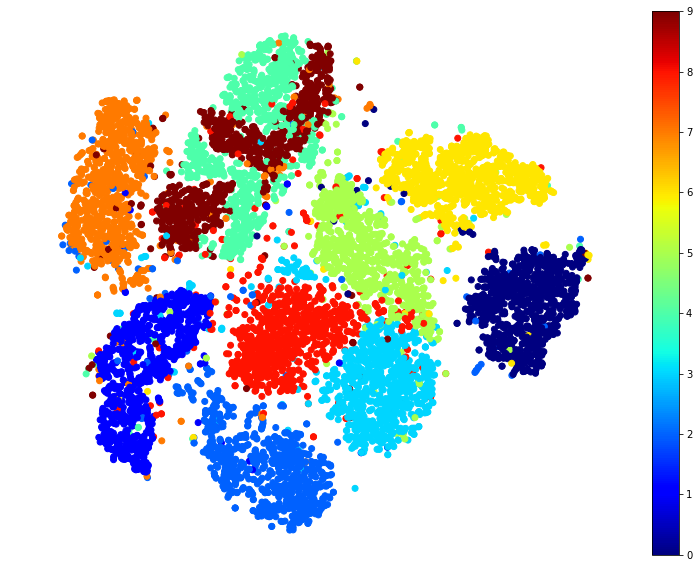

In [186]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

> * 어떤 숫자가 다른 것과 구분이 쉬운지 알려준다(가령 0, 6 등이 잘 구분되어 있다).
* 어떤 숫자가 구분이 어려운지 알려준다(가령 4, 9).

#### 많이 겹쳐진 것 같은 4와 9에 focus

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


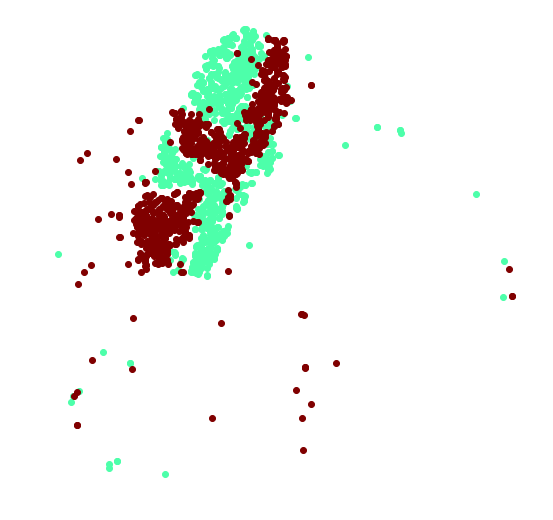

In [188]:
import matplotlib as mpl

plt.figure(figsize=(9, 9))
cmap = mpl.cm.get_cmap('jet')

for digit in (4, 9):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], 
                c=cmap(digit / 9))
plt.axis('off')    
plt.show()

#### 이 2개의 숫자에 t-SNE를 실행시켜 더 나은 이미지 만들기

In [191]:
idx = (y == 4) | (y == 9)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


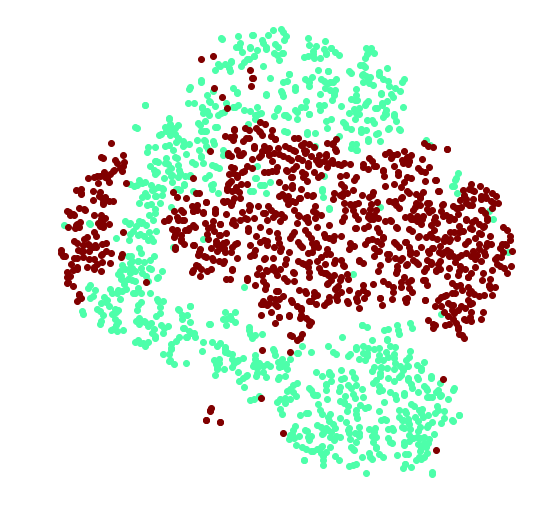

In [193]:
plt.figure(figsize=(9, 9))

for digit in (4, 9):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], 
                X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

> 훨씬 좋다. 군집이 덜 겹쳐졌다.  
하지만 숫자 4가 2개의 군집으로 나뉘었다.  
각 군집에 숫자를 몇 개씩 나타내면 훨씬 이해하기 좋을 것 같다.

#### 각 군집에 숫자를 몇 개씩 나타내기

문제: 또는 샘플의 위치에 각기 다른 색깔의 숫자를 나타낼 수도 있고, 숫자 이미지 자체의 크기를 줄여서 그릴 수도 있습니다(모든 숫자를 다 그리면 그래프가 너무 복잡해지므로 무작위로 선택한 샘플만 그리거나, 인접한 곳에 다른 샘플이 그려져 있지 않은 경우에만 그립니다). 잘 분리된 숫자의 군집을 시각화할 수 있을 것입니다.

산점도와 색깔있는 숫자를 쓰기위한 함수 정의 (`plot_digits()`)
* 이 숫자 사이의 거리가 최소가 되도록 한다. (숫자 이미지가 있다면 대신 이를 사용한다.)

In [196]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X) # 입력 특성 스케일 0 ~ 1로 변환
    # 그릴 숫자의 좌표 목록을 만든다.
    # 반복문 아래에서 if를 쓰지 않기 위해 이미 그래프가 그려져 있다고 가정한다.
    neighbors = np.array([[10., 10.]]) 
    
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap('jet')
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                   c=cmap(digit / 9))
    plt.axis('off')
    ax = plt.gcf().gca() # 현재 그래프의 축을 가져온다.
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, 
                                         axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                        color=cmap(y[index] / 9), fontdict={'weight': 'bold',
                                                           'size': 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap='binary'),
                                         image_coord)
                ax.add_artist(imagebox)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

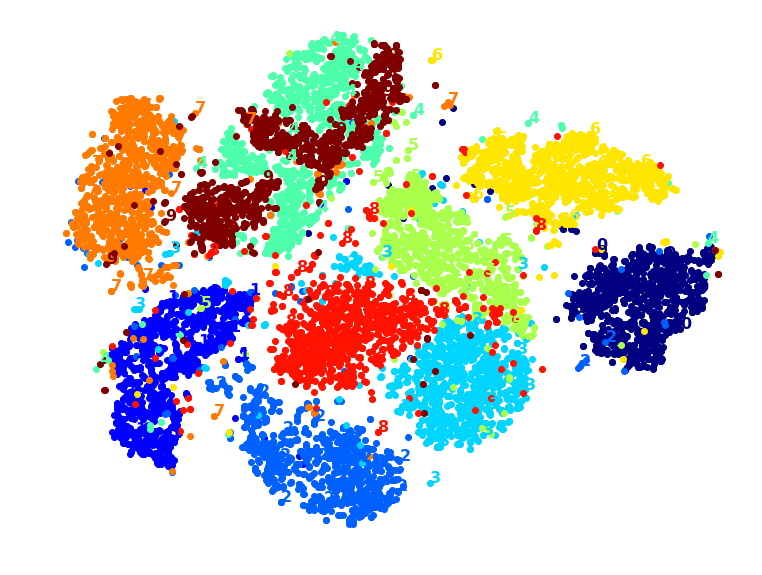

In [197]:
plot_digits(X_reduced, y)

> 꽤 좋지만 아름답지는 않다.

#### 숫자 이미지로 나타내기

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

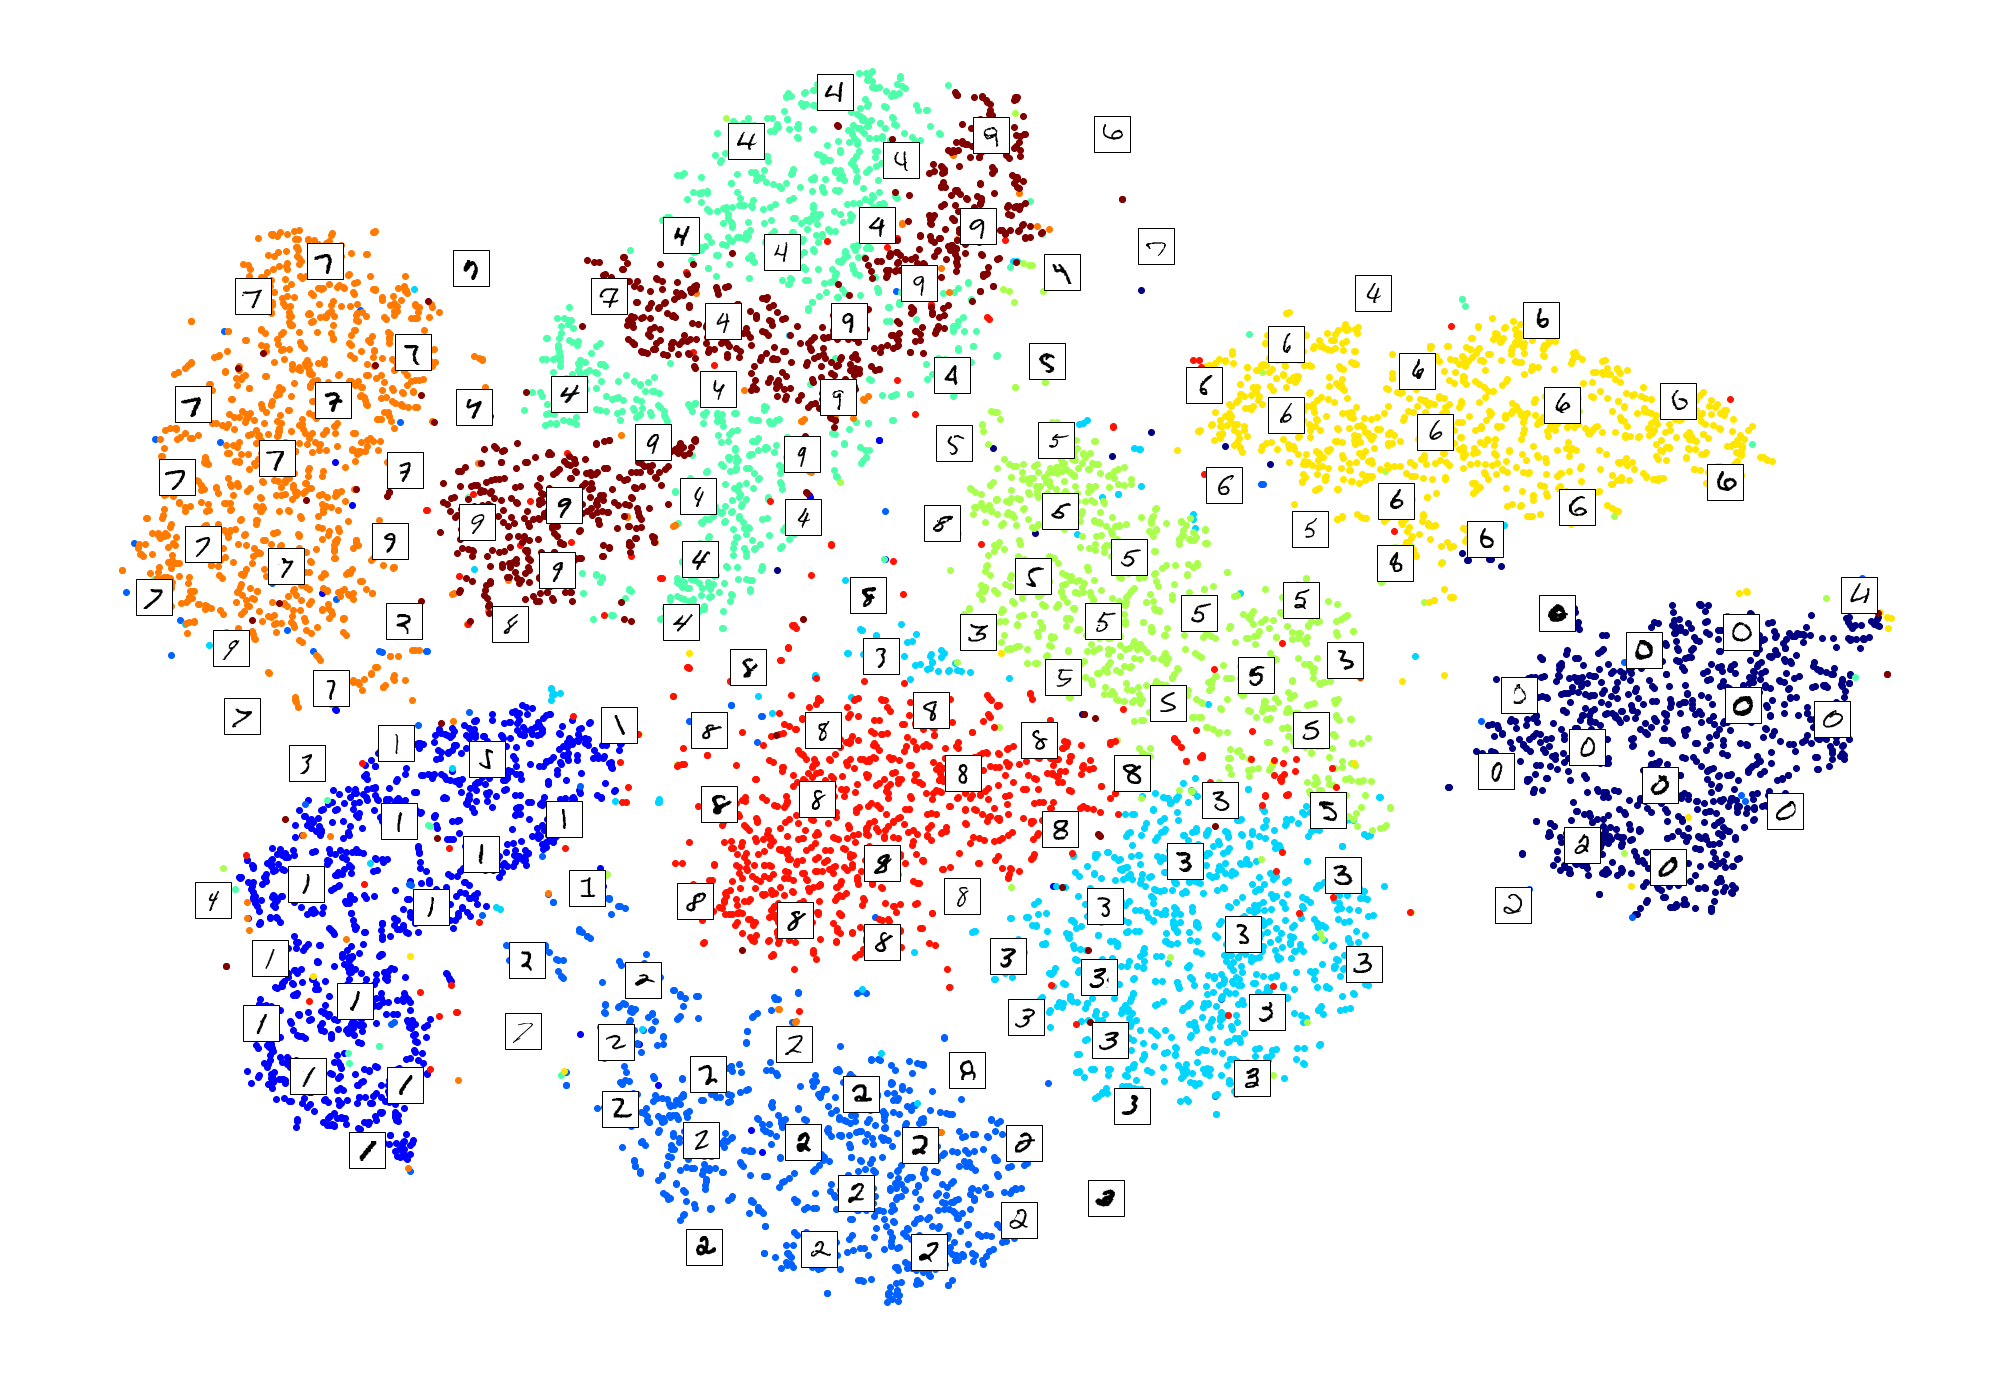

In [198]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


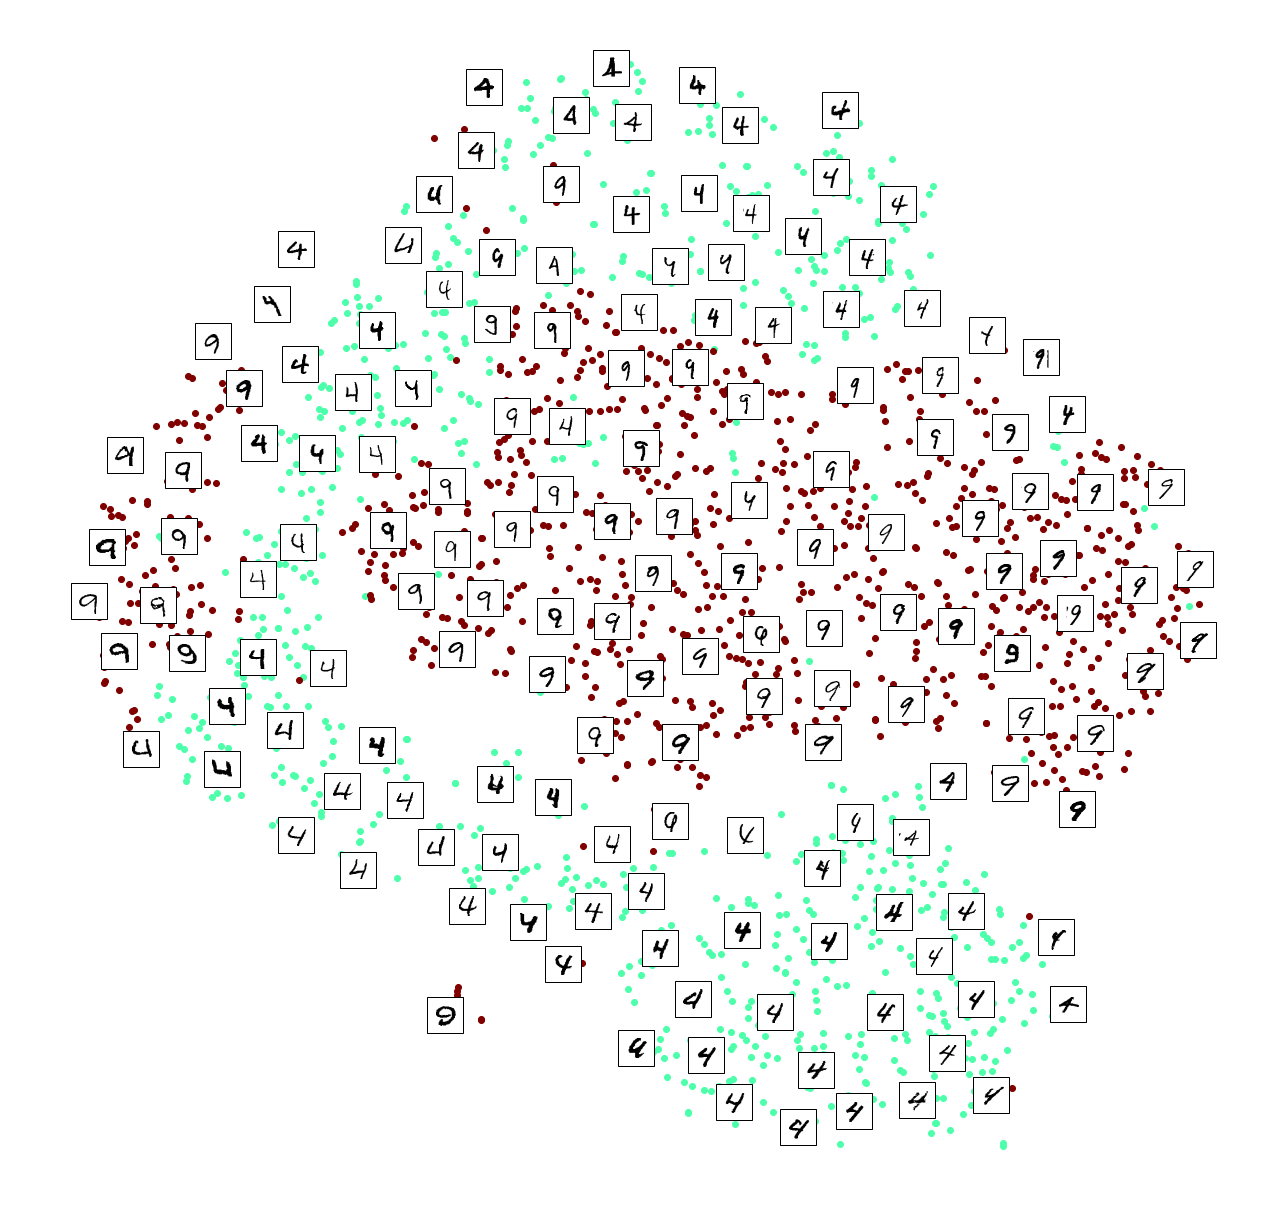

In [199]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

문제: PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보세요.

#### PCA

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA 시간: 0.3s


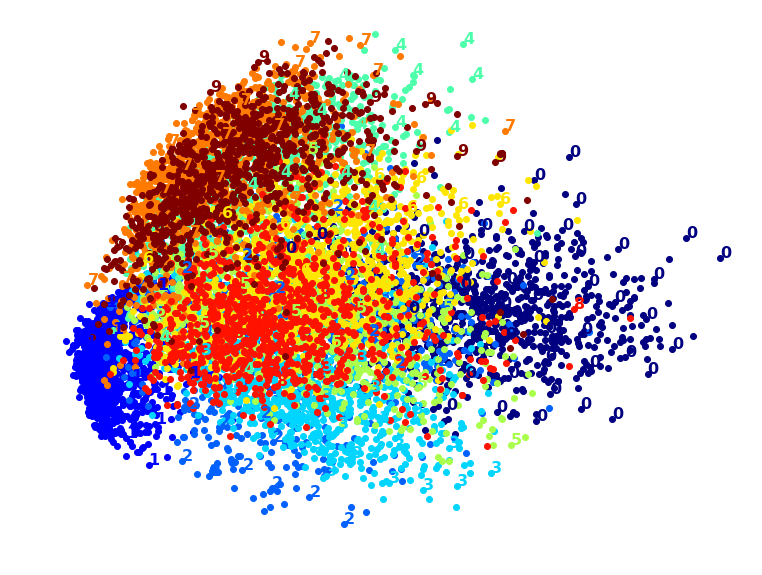

In [202]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA 시간: {:.1f}s".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

> 매우 빠르다.  
몇 개의 군집이 보이지만 너무 겹쳐있다.

#### LLE

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

LLE 시간: 165.5s.


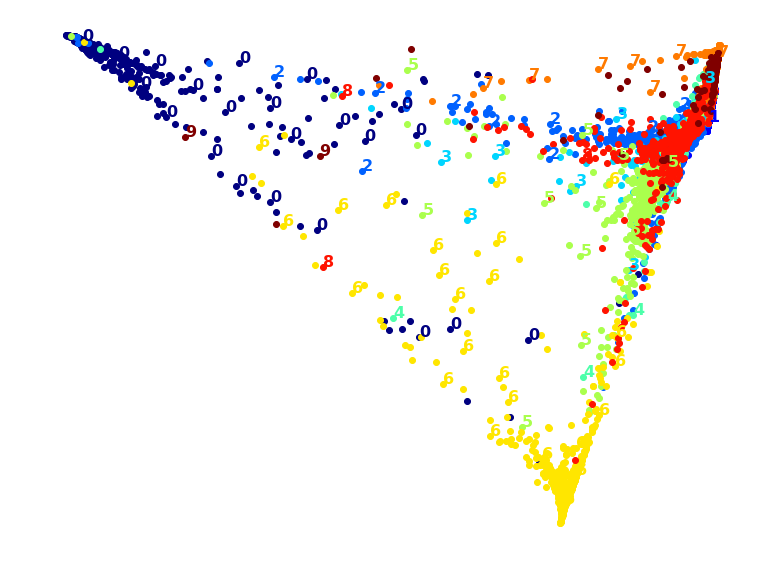

In [203]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, 
                                       random_state=42).fit_transform(X)
t1 = time.time()
print("LLE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

> 시간이 좀 걸리고 결과도 아주 좋지는 않다.  

#### 분산의 95%를 보존하도록 먼저 PCA 적용했을 때의 LLE

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA+LLE 시간: 48.0s.


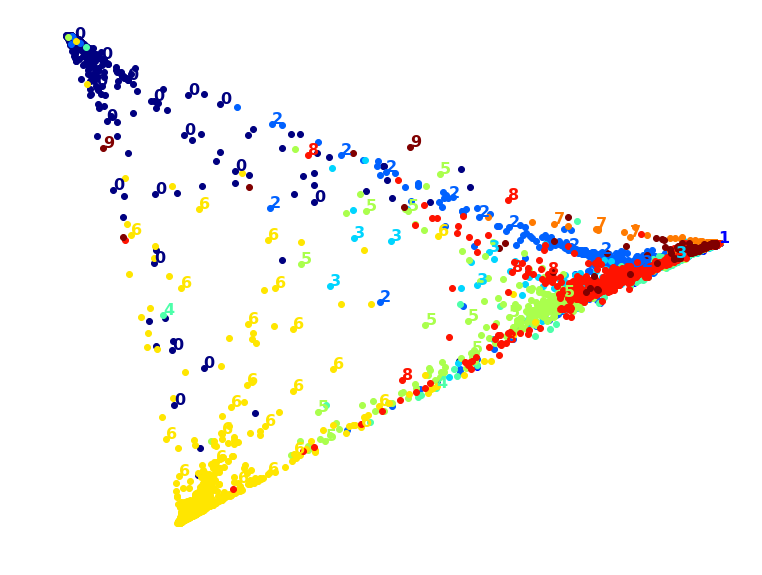

In [204]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('lle', LocallyLinearEmbedding(n_components=2, random_state=42))
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

> 결과는 비슷하지만 시간이 매우 많이 줄었다.

#### MDS
2,000개 샘플 시도 (10,000개 샘플 적용하면 이 알고리즘은 너무 오래걸리므로)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

MDS 시간: 197.7s (10,000개가 아니고 2,000 MNIST 이미지에서).


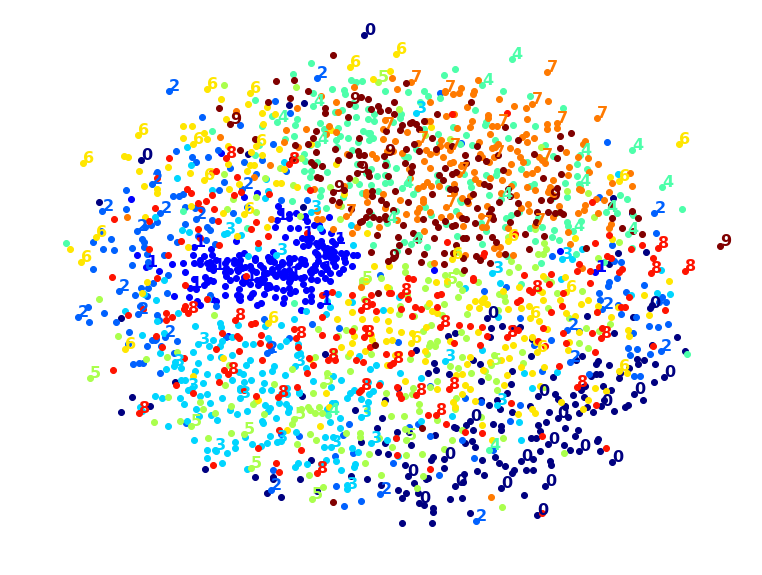

In [206]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS 시간: {:.1f}s (10,000개가 아니고 2,000 MNIST 이미지에서).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

> 이건 좋지 않아 보인다.  
모든 군집이 너무 중복되어 있다.

#### PCA를 적용한 MDS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA+MDS 시간: 196.0s (on 2,000 MNIST images).


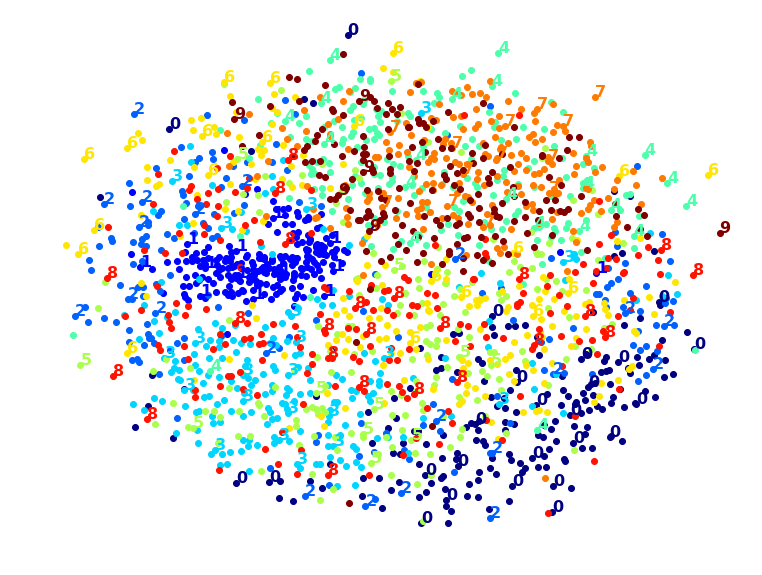

In [208]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('mds', MDS(n_components=2, random_state=42))
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS 시간: {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

> 같은 결과에 속도도 동일하다.  
PCA가 도움이 되지 않는다.

#### LDA

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LDA 시간: 2.2s.


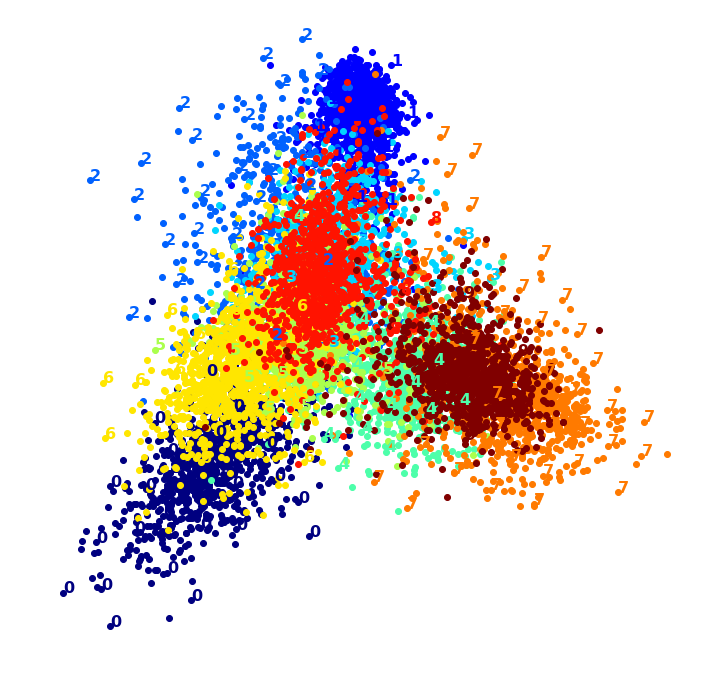

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

> 매우 빨라 괜찮아 보이지만, 몇 개의 군집이 심각하게 중복되어 있다.

종합적으로 비교했을 때 t-SNE가 좋은 것 같다.  
#### 시간 재어서 t-SNE 확인해보기

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

t-SNE 시간: 312.7s.


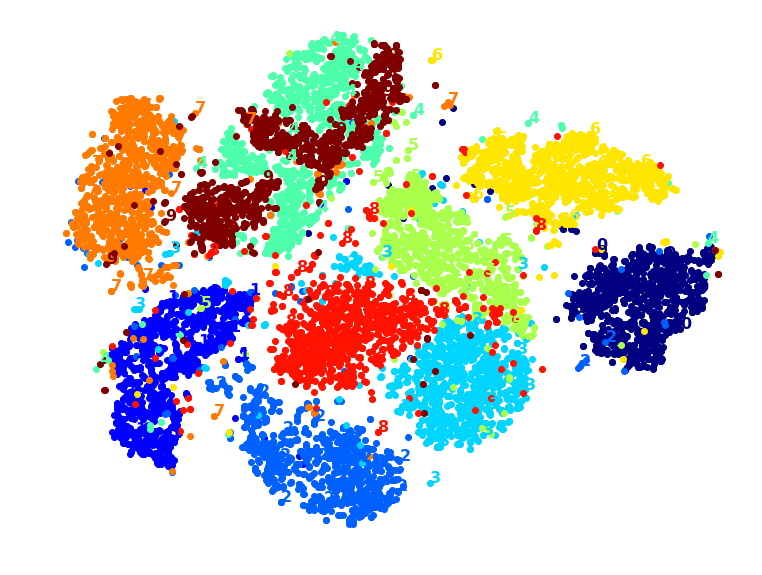

In [212]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

> LLE보다 2배나 느리지만, MDS보단 훨씬 빠르고 결과물도 아주 좋다.  

PCA가 속도를 향상시킬지 확인해보기 

#### PCA를 적용한 t-SNE

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA+t-SNE 시간 196.8s.


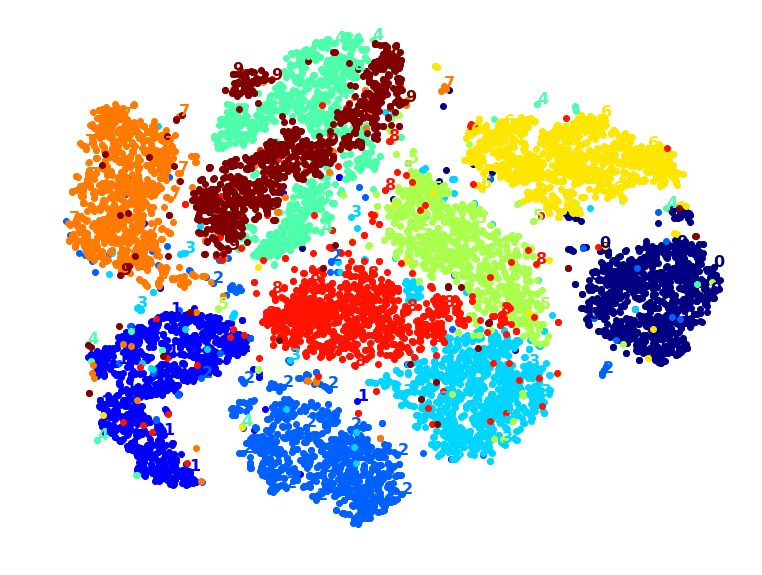

In [213]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE 시간 {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

> 결과물에 영향을 미치지 않으면서 PCA 속도가 30% 이상이 향상되었다.  
t-SNE가 제일 좋다.